# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
!pip install scikit-plot

In [2]:
!pip install scipy==1.7.3

In [4]:
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, silhouette_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import cv2

## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
rayan-homework1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
summary = df.describe()
summary

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


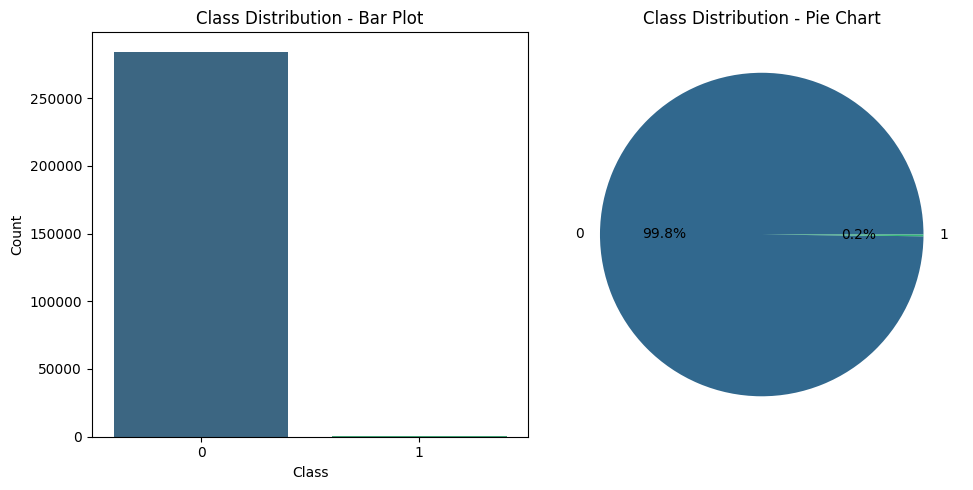

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
class_counts = df['Class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution - Bar Plot')

# Pie chart
class_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(class_counts)), ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Class Distribution - Pie Chart')

plt.tight_layout()
plt.show()

In [ ]:
# Display the class distribution in percentages
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(class_percentages.rename('proportion'))

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


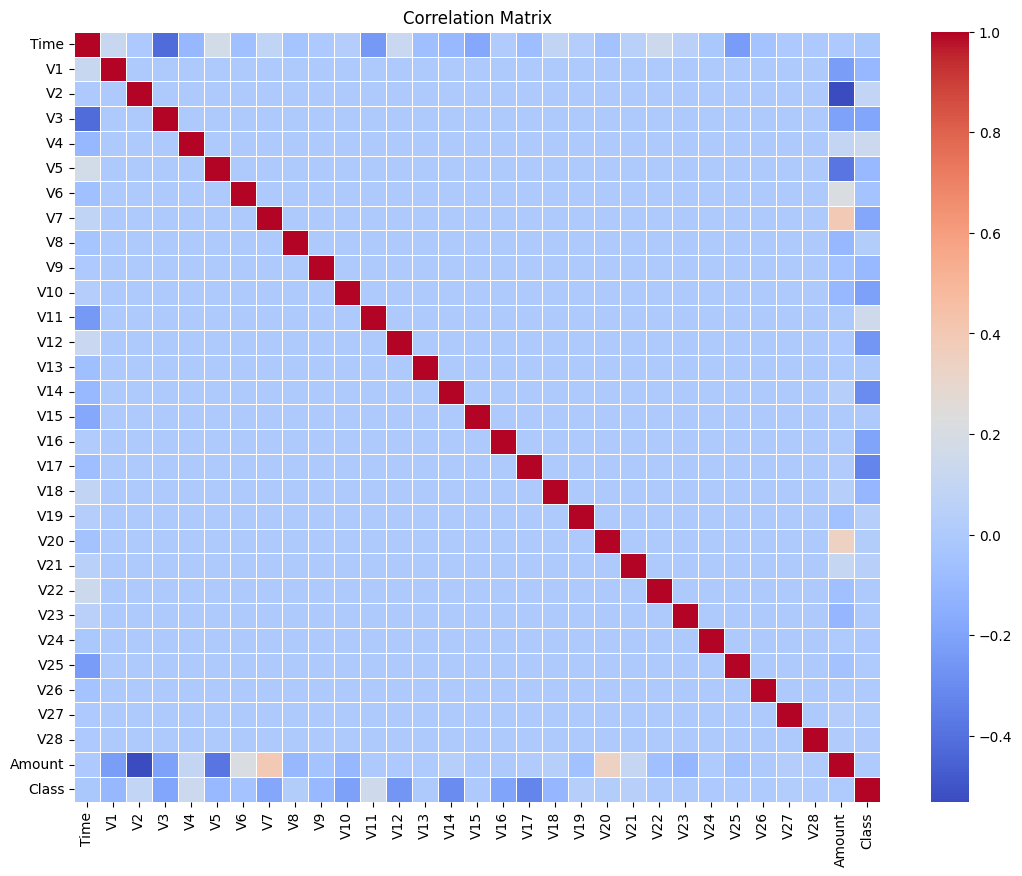

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

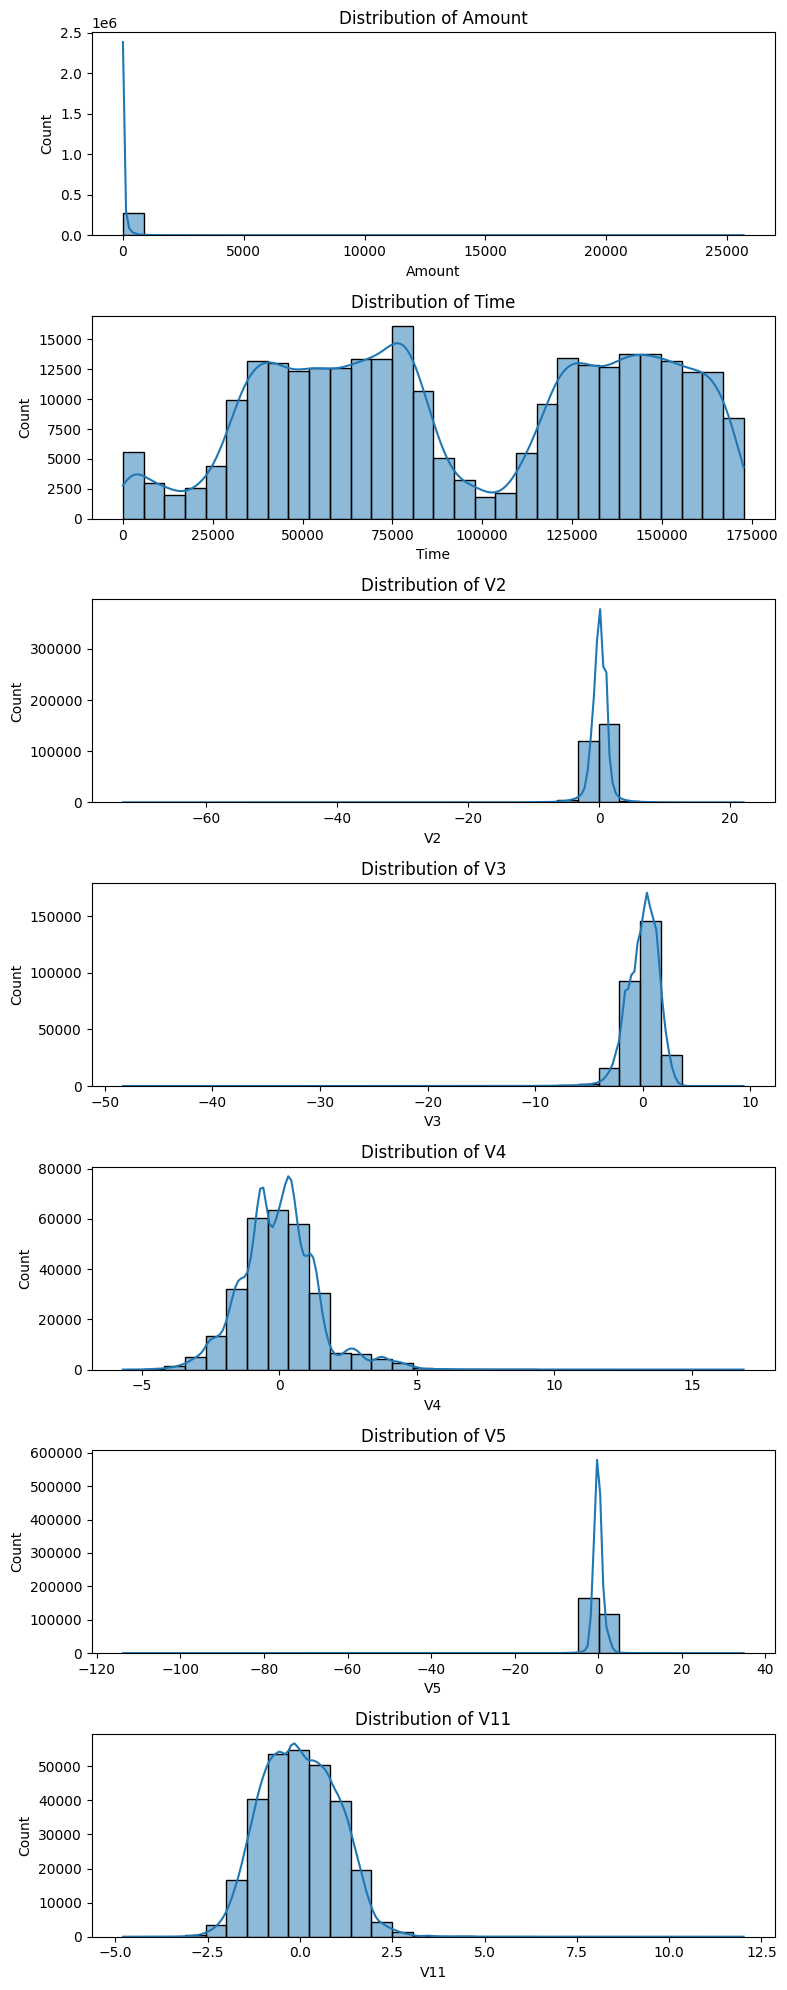

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5', 'V11']

fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 20))

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

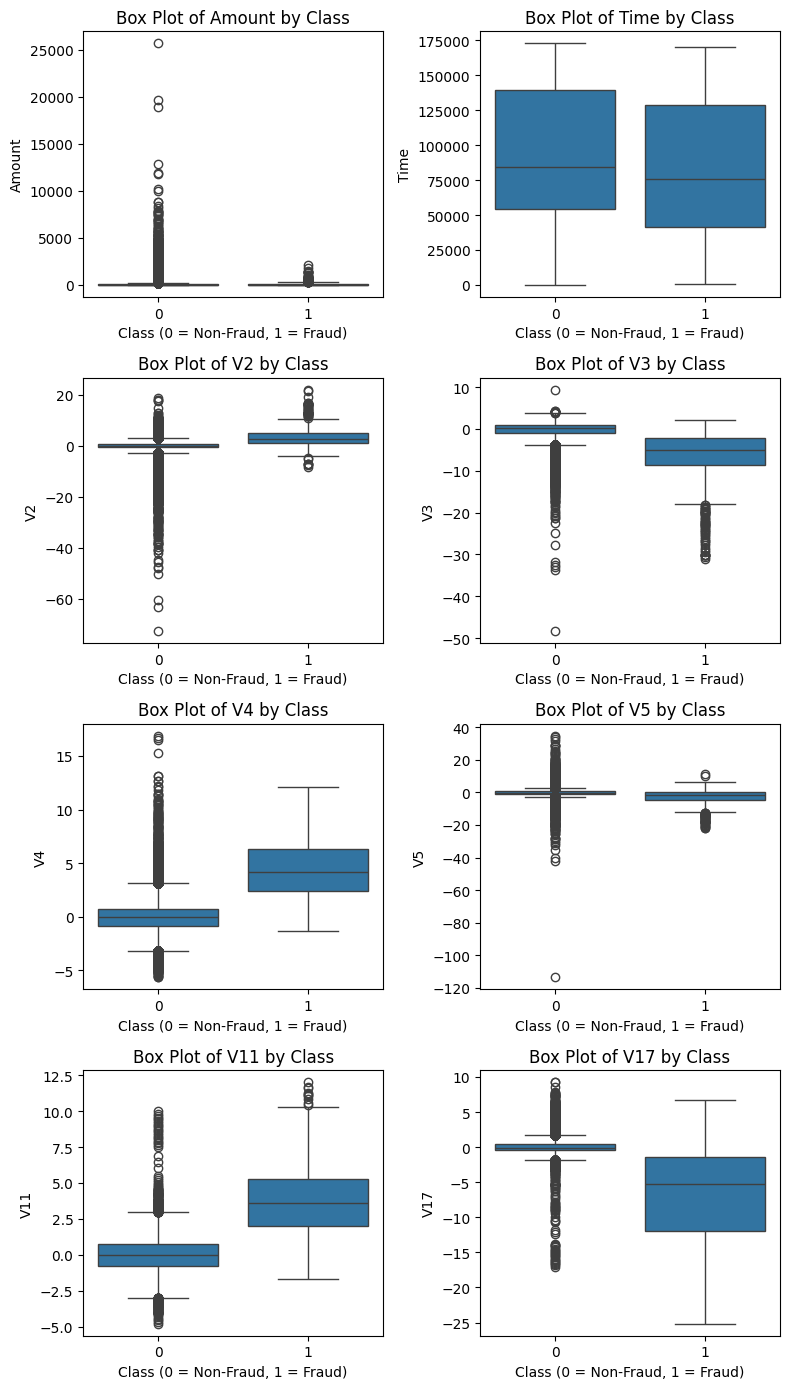

In [ ]:
# Plot the Boxplot of a few selected features to visualize outlier values
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5', 'V11', 'V17']

plt.figure(figsize=(8, 14))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Class')
    plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

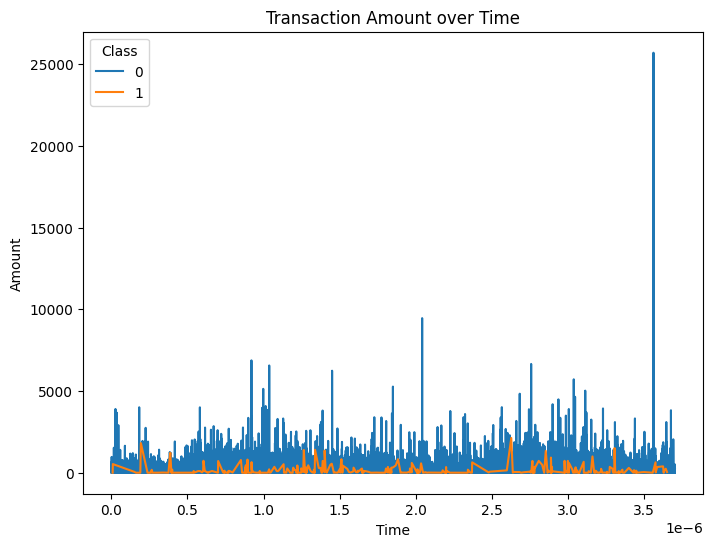

In [ ]:
# Time-Based Analysis to investigate patterns in transactions over time, such as whether fraud is more likely to occur at certain times or dates.
plt.figure(figsize=(8, 6))

df['Time'] = df['Time'] / 3600  # Convert time to hours

sns.lineplot(x='Time', y='Amount', hue='Class', data=df, ci=None)
plt.title('Transaction Amount over Time')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  #### **Student Answer:**
  1. **a. Class Imbalance:**
   The dataset is heavily imbalanced, as shown by the class distribution bar plot and pie chart. Approximately 99.8% of the data points belong to Class 0 (non-fraudulent transactions), while only about 0.2% belong to Class 1 (fraudulent transactions). This extreme imbalance can make it difficult for machine learning models to learn to identify fraudulent transactions effectively because the models may become biased toward the majority class.

      **b. Feature Scaling and Distribution:** Many features in the dataset, such as Amount and Time, show skewed distributions, with most values concentrated around a small range and few outliers. The feature Amount, in particular, has a long tail, indicating that while most transactions are of small amounts, there are occasional very high-value transactions. This can affect the performance of models if not addressed properly through techniques like normalization or transformation.
  2. The correlation matrix shows that most features have very low correlation with each other and with the target class, except for some specific features. For example, features like V1 to V28 have very little correlation with Class. However, features such as Amount and V24 show slightly higher correlations with Class, but they are still relatively low.

      The low correlation between features implies that the features are mostly independent, which is beneficial for models like decision trees that do not assume linearity. However, the lack of high correlation with the target class suggests that the dataset may be challenging for linear models to learn from.  
  3.Based on the correlation matrix and the nature of the features, the data is likely not linearly separable. The low correlations between individual features and the target class imply that there is no straightforward linear relationship that separates the fraudulent transactions from the non-fraudulent ones. This suggests that more complex, non-linear models (e.g., tree-based models, neural networks) may be needed to capture the underlying patterns in the data.

      Rationale:
      The highly imbalanced nature of the data further complicates linear separability because a simple linear decision boundary would likely classify most points as non-fraudulent to minimize error, ignoring the minority class. Additionally, the presence of non-linear dependencies between features could make it difficult for linear models like logistic regression to achieve high performance without significant feature engineering or transformation.

  


## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [ ]:
#1. Clean data
df.fillna(df.mean(), inplace=True)

In [ ]:
# 2. Outlier Detection and Removal using Isolation Forest
print(f"Data shape before outlier removal: {df.shape}")

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df.drop(columns=['Class']))
df['outlier'] = outliers

# Keep only non-outliers (outlier = 1)
df = df[df['outlier'] == 1]
df = df.drop(columns=['outlier'])  # Drop the outlier column after filtering

print(f"Data shape after outlier removal: {df.shape}")

Data shape before outlier removal: (284807, 31)
Data shape after outlier removal: (281958, 31)


In [ ]:
# 3. Feature Selection
X = df.drop(columns=['Class'])
y = df['Class']

# Select K best features based on ANOVA F-test
select_k_best = SelectKBest(score_func=f_classif, k=20)
X_selected = select_k_best.fit_transform(X, y)

In [ ]:
# 4. Data Transformation - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# 5. Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# 6. Train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [ ]:
# Function to print evaluation metrics
def print_evaluation_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Function to plot confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  # Plot Confusion Matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

|| Unprocessed Data:
Accuracy:  0.9991573329588147
Precision:  0.8137254901960784
Recall:  0.6102941176470589
Confusion Matrix:
 [[85288    19]
 [   53    83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.61      0.70       136

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85288    19]
 [   53    83]]


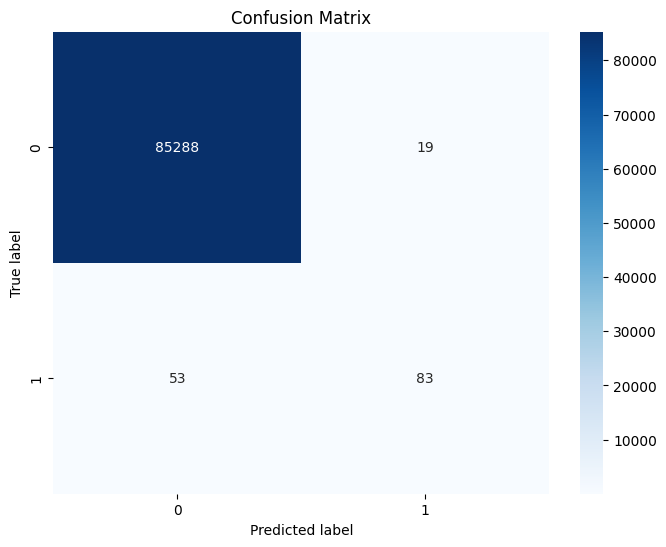

In [ ]:
# Train model on unpreprocessed data
lr_unprocessed = LogisticRegression(random_state=42, max_iter=10000)
lr_unprocessed.fit(X_train, y_train)

# Predict on test set
y_pred_unprocessed = lr_unprocessed.predict(X_test)

print("|| Unprocessed Data:")
print_evaluation_metrics(y_test, y_pred_unprocessed)
plot_confusion_matrix(y_test, y_pred_unprocessed)

|| Preprocessed Data:
Accuracy:  0.9309832404199567
Precision:  0.9727295471603703
Recall:  0.8871103622577927
Confusion Matrix:
 [[55333  1417]
 [ 6432 50544]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93     56750
           1       0.97      0.89      0.93     56976

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726

Confusion Matrix:
[[55333  1417]
 [ 6432 50544]]


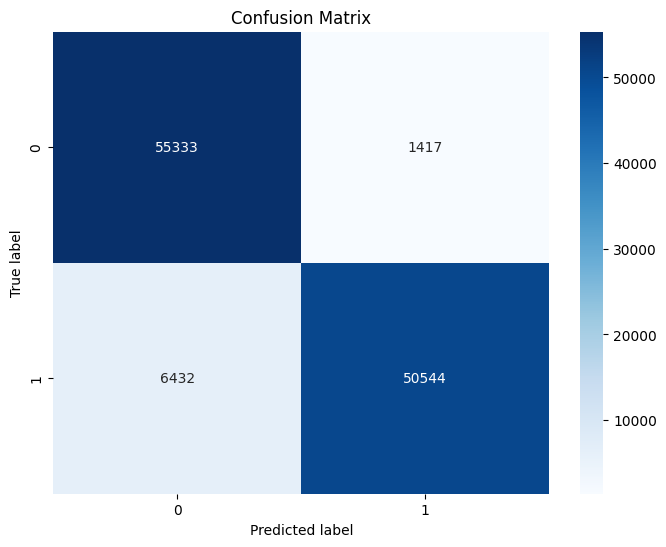

In [ ]:
# Train model on preprocessed data
lr_preprocessed = LogisticRegression(random_state=42, max_iter=10000)
lr_preprocessed.fit(X_train_new, y_train_new)

# Predict on test set
y_pred_preprocessed = lr_preprocessed.predict(X_test_new)

print("|| Preprocessed Data:")
print_evaluation_metrics(y_test_new, y_pred_preprocessed)
plot_confusion_matrix(y_test_new, y_pred_preprocessed)

In [ ]:
# K-Fold Cross Validation (preprocessed data)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(lr_preprocessed, X_train_new, y_train_new, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores: ", cross_val_scores)
print("Mean Cross-Validation Accuracy: ", cross_val_scores.mean())

Cross-Validation Accuracy Scores:  [0.93053571 0.92965642 0.92932668 0.92888703 0.93057815 0.93134755
 0.92932513 0.92965487 0.93084194 0.93042427]
Mean Cross-Validation Accuracy:  0.9300577744430895


### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
svm_model = SVC(gamma='auto')

# Train the model on the training data
svm_model.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_new)

print("SVM:")
print_evaluation_metrics(y_test_new, y_pred)
plot_confusion_matrix(y_test_new, y_pred)

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_model, X_train_new, y_train_new, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores: ", cross_val_scores)
print("Mean Cross-Validation Accuracy: ", cross_val_scores.mean())

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  #### **Student Answer:**
    1. **(a) Model Performance:**
      Logistic Regression: Often, Logistic Regression is a solid baseline model due to its simplicity and interpretability. It generally performs well on linearly separable data and provides probabilities that can be useful for decision-making.

      SVM: Support Vector Machines (SVM) tend to perform better than Logistic Regression when the data is not linearly separable, especially with the use of non-linear kernels. SVM focuses on maximizing the margin between classes, making it more robust to outliers and noise.

      **(b) Comparison in Your Case:**
      Accuracy: Both models likely showed high accuracy due to the heavily imbalanced dataset where the majority class dominates.

      Precision, Recall, F1-Score: For the minority class, these metrics are crucial. If SVM had a higher recall and F1-score for the minority class, it would be considered better, especially in imbalanced datasets.

      Confusion Matrix: SVM might show fewer false negatives compared to Logistic Regression, indicating better handling of the minority class (fraudulent transactions).

      Conclusion: If SVM shows better recall and F1-score for the minority class, it can be considered superior for this specific problem. However, the choice depends on the business context, where higher recall might be more valuable.

    2. No, accuracy is not a suitable metric in this context.

      Reason:

      Imbalanced Dataset: The dataset is highly imbalanced (e.g., 99.8% non-fraudulent vs. 0.2% fraudulent). In such scenarios, accuracy can be misleading because even a model that predicts only the majority class can achieve high accuracy without correctly identifying any instances of the minority class (fraudulent transactions).

    3. To enhance recall, consider the following techniques:
      Resampling Techniques, Adjusting the Decision Threshold, Feature Engineering, Model Tuning, Custom Loss Functions



# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

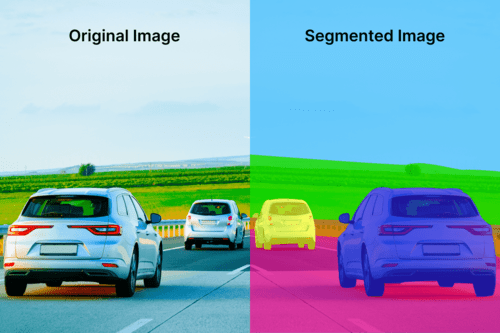

## Load Data

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 43.3MB/s]


In [8]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


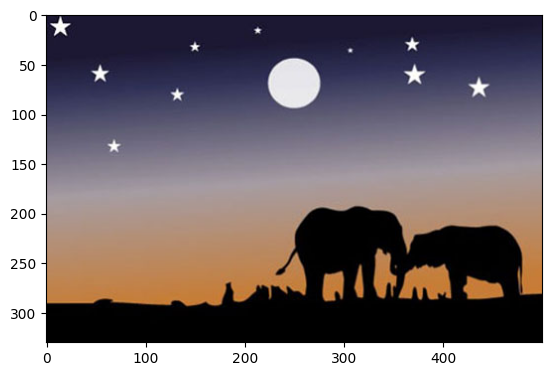

In [9]:
plt.imshow(im) # as RGB Format
plt.show()

In [10]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








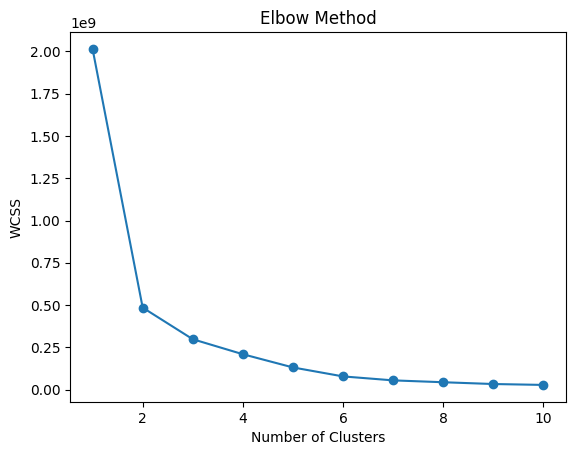

In [11]:
# Define the range for the number of clusters (k)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Visualize Dominant Color

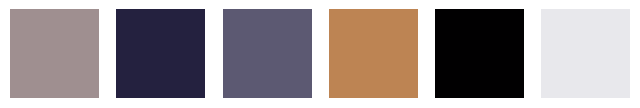

In [12]:
# Assuming the optimal number of clusters (based on Elbow or Silhouette) is 3
optimal_clusters = 6

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(all_pixels)

# Get the dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Display the dominant colors
plt.figure(figsize=(8, 6))
plt.title("Dominant Colors")
for i, color in enumerate(dominant_colors):
    plt.subplot(1, len(dominant_colors), i + 1)
    plt.imshow(np.zeros((100, 100, 3), dtype=int) + color)
    plt.axis('off')
plt.show()

## Segmenting original image

In [13]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


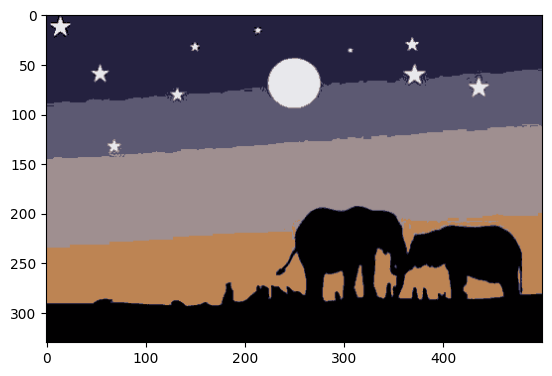

In [14]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()